# Thicket and Extra-P: Thicket Tutorial

Thicket is a python-based toolkit for Exploratory Data Analysis (EDA) of parallel performance data that enables performance optimization and understanding of applications’ performance on supercomputers. It bridges the performance tool gap between being able to consider only a single instance of a simulation run (e.g., single platform, single measurement tool, or single scale) and finding actionable insights in multi-dimensional, multi-scale, multi-architecture, and multi-tool performance datasets.

This notebook provides an example for using Thicket's modeling feature. The modeling capability relies on _Extra-P_ - a tool for empirical performance modeling. It can perform N-parameter modeling with up to 3 parameters (N <= 3). The models follow a so-called _Performance Model Normal Form (PMNF)_ that expresses models as a summation of polynomial and logarithmic terms. One of the biggest advantages of this modeling method is that the produced models are human-readable and easily understandable.

**NOTE: An interactive version of this notebook is available in the Binder environment.**

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/llnl/thicket-tutorial/develop)

***

## 1. Import Necessary Packages

To explore the capabilities of thicket with Extra-P, we begin by importing necessary packages.

In [1]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from IPython.display import HTML

import thicket as th
from thicket.model_extrap import Modeling

display(HTML("<style>.container { width:80% !important; }</style>"))

<IPython.core.display.Javascript object>

## 2. Define Dataset Paths and Names

In this example, we use an MPI scaling study, profiled with Caliper, that has metadata about the runs. The data is also already aggregated, which means we can provide the data to Extra-P as-is.

In [2]:
data = "../data/mpi_scaling_cali"
t_ens = th.Thicket.from_caliperreader(data)

Specifically, the metadata table for this set of profiles contains a `jobsize` column, which provides the amount of cores used for each profile.

In [3]:
t_ens.metadata["jobsize"]

profile
-8090931487673920031     64
-281908797508534030     125
 938109236477167326     216
 3071605971850147300     27
 5507601860982680356    343
Name: jobsize, dtype: int64

## 3. More Information on a Function
***
You can use the `help()` method within Python to see the information for a given object. You can do this by typing `help(object)`. 
This will allow you to see the arguments for the function, and what will be returned. An example is below.

In [4]:
help(Modeling)

Help on class Modeling in module thicket.model_extrap:

class Modeling(builtins.object)
 |  Modeling(tht, param_name, params=None, chosen_metrics=None)
 |  
 |  Produce models for all the metrics across the given graphframes.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tht, param_name, params=None, chosen_metrics=None)
 |      Create a new model object.
 |      
 |      Adds a model column for each metric for each common frame across all the
 |      graphframes.
 |      
 |      The given list of params contains the parameters to build the models.  For
 |      example, MPI ranks, input sizes, and so on.
 |      
 |      Arguments:
 |          tht (Thicket): thicket object
 |          param_name (str): arbitrary if 'params' is being provided, otherwise name of
 |              the metadata column from which 'params' will be extracted
 |          params (list): parameters list, domain for the model
 |          chosen_metrics (list): metrics to be evaluated in the model, range f

## 3. Create Models

First, we construct the `Modeling` object by passing all the relevant data to it. We provide `jobsize` as the `param_name` argument so the model will grab this column from the metadata table to use as our parameter. We also sub-select some metrics, since this dataset has a lot of metrics (otherwise the modeling will take a long time to do all metrics).

Then, we call `produce_models` on that object (it's unnecessary to provide an aggregation function since the data is already aggregated.).

**NOTE:** For this example, you can view all the metric columns by adding a new cell and running: `t_ens.performance_cols`. 

In [5]:
mdl = Modeling(
    t_ens,
    "jobsize",
    chosen_metrics=[
        "Total time",
    ],
)

mdl.produce_models()

## 4. Models Dataframe

Model hypothesis functions are stored in thicket's aggregated statistics table.

In [6]:
t_ens.statsframe.dataframe

,name,Total time_extrap-model,Total time_RSS_extrap-model,Total time_rRSS_extrap-model,Total time_SMAPE_extrap-model,Total time_AR2_extrap-model,Total time_RE_extrap-model
node,,,,,,,
"{'name': 'MPI_Allreduce', 'type': 'function'}",MPI_Allreduce,-0.002483573830186528 + 4.6723137107329955e-09...,2.373695e-02,33.638540,71.854711,0.982806,1.569021
"{'name': 'MPI_Bcast', 'type': 'function'}",MPI_Bcast,0.00559462276666876 + 1.1211777143604536e-05 *...,5.234884e-03,0.592849,18.775441,0.994136,0.222561
"{'name': 'MPI_Comm_dup', 'type': 'function'}",MPI_Comm_dup,0.20714199930961907 + 0.00037948721323388787 *...,1.468475e+01,1.458439,50.350316,0.324860,0.467371
"{'name': 'MPI_Comm_free', 'type': 'function'}",MPI_Comm_free,2.9748964461513302e-05 + 2.9632810629043057e-0...,4.012398e-08,0.026386,5.697692,0.995381,0.054844
"{'name': 'MPI_Comm_split', 'type': 'function'}",MPI_Comm_split,0.03409920994697361 + 4.861767349462246e-07 * ...,4.094649e+00,1.584798,40.927787,0.904711,0.445655
"{'name': 'MPI_Gather', 'type': 'function'}",MPI_Gather,1.1110717100841163e-05 + 1.875931772029739e-09...,1.805567e-07,2.319450,37.410684,0.857675,0.515782
"{'name': 'MPI_Initialized', 'type': 'function'}",MPI_Initialized,-1.215751199133331e-06 + 4.473650007736346e-06...,2.079887e-09,0.016595,4.528570,0.997857,0.046511
"{'name': 'main', 'type': 'function'}",main,5.334585402553237 + 50.44722398708032 * p^(1),1.428021e+07,0.132731,15.651588,0.886893,0.157082
"{'name': 'MPI_Barrier', 'type': 'function'}",MPI_Barrier,-3.8613044063814534 + 0.7228867130047674 * log...,7.133681e+00,80964.639853,127.158285,-0.330302,65.337903


## 5. Show the Models Dataframe with Embedded Plots

(For every `node`, sub-selected `metric` combination)

,Total time_extrap-model
node,
"{'name': 'MPI_Allreduce', 'type': 'function'}",
"{'name': 'MPI_Bcast', 'type': 'function'}",
"{'name': 'MPI_Comm_dup', 'type': 'function'}",
"{'name': 'MPI_Comm_free', 'type': 'function'}",
"{'name': 'MPI_Comm_split', 'type': 'function'}",
"{'name': 'MPI_Gather', 'type': 'function'}",
"{'name': 'MPI_Initialized', 'type': 'function'}",
"{'name': 'main', 'type': 'function'}",
"{'name': 'MPI_Barrier', 'type': 'function'}",

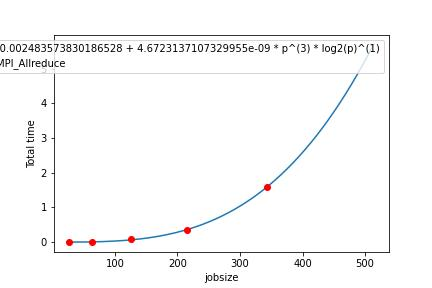
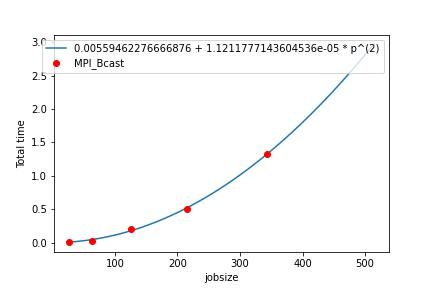
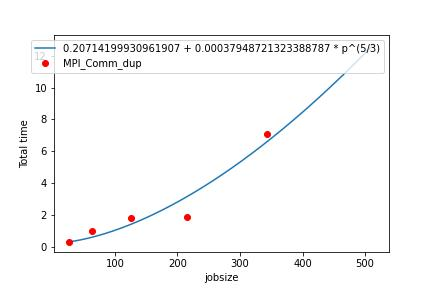
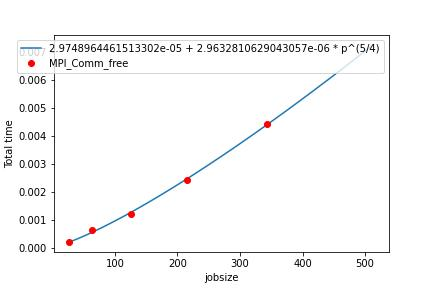
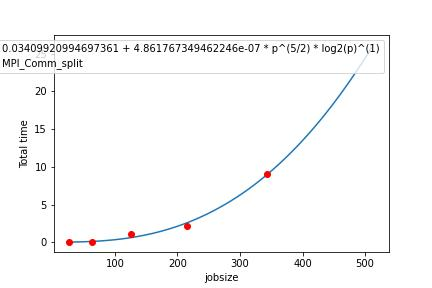
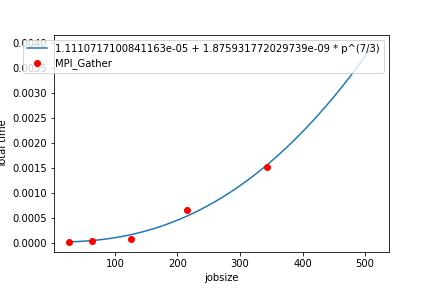
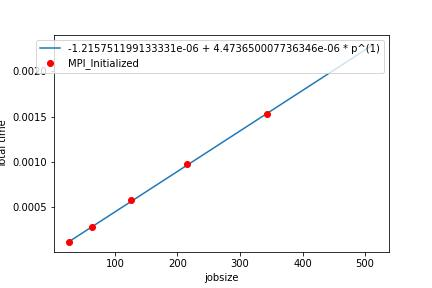
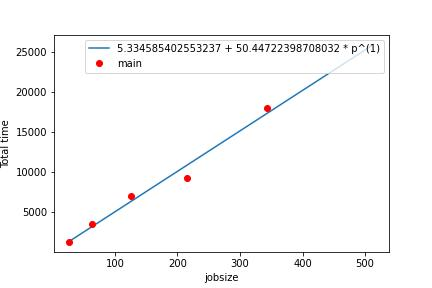
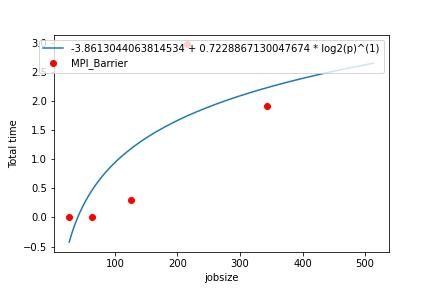
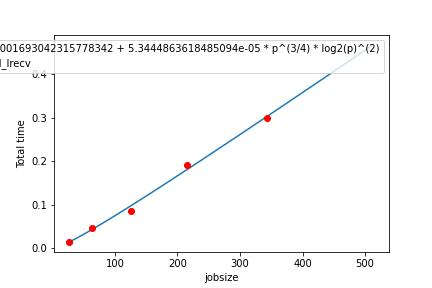
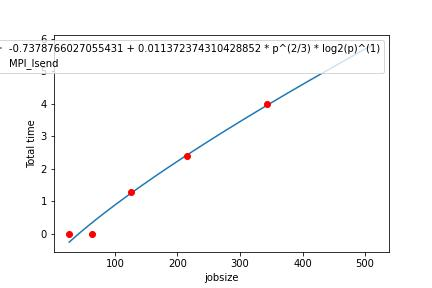
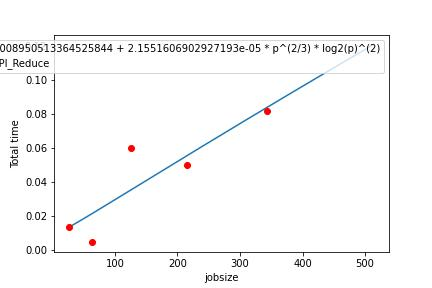
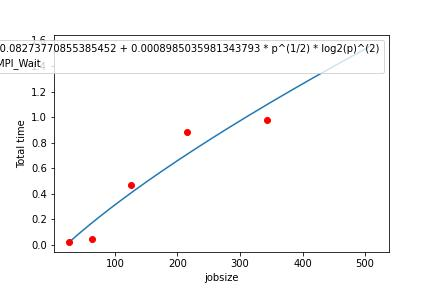
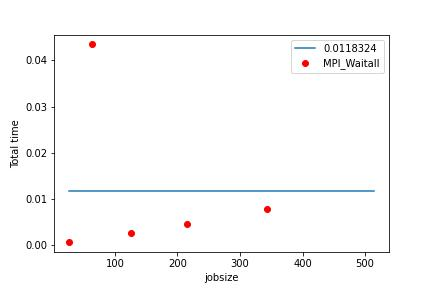
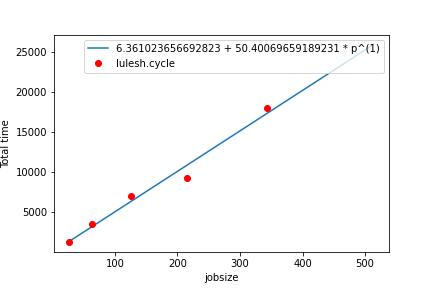
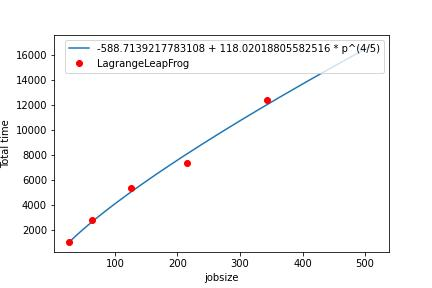
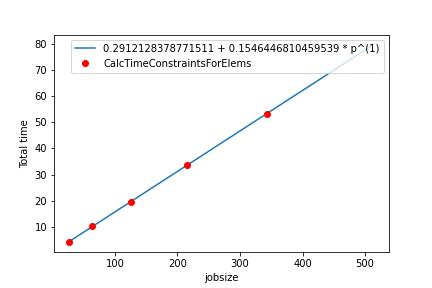
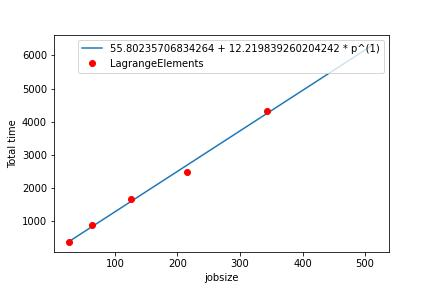
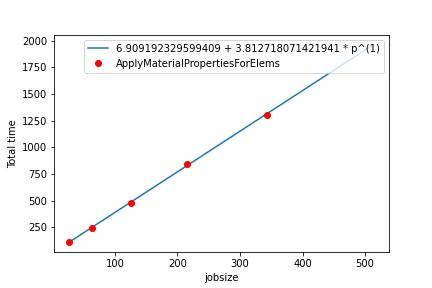
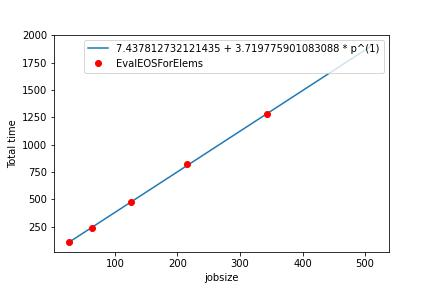
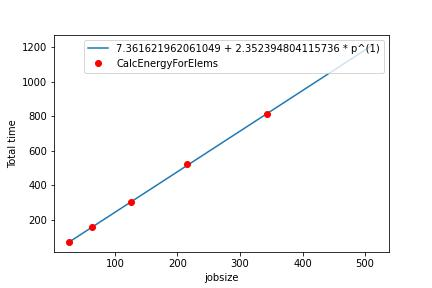
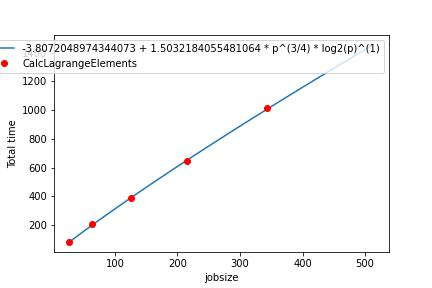
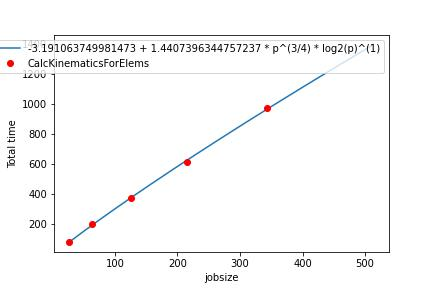
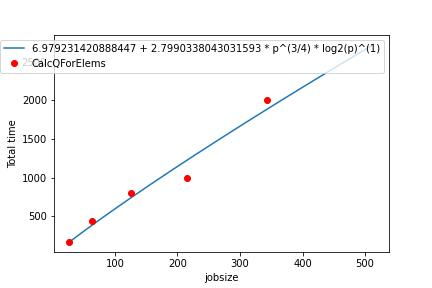
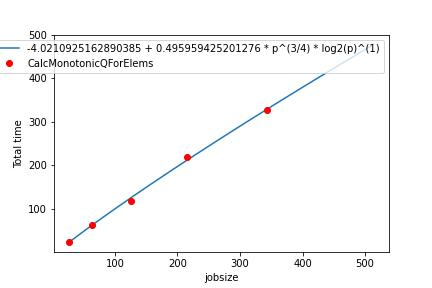
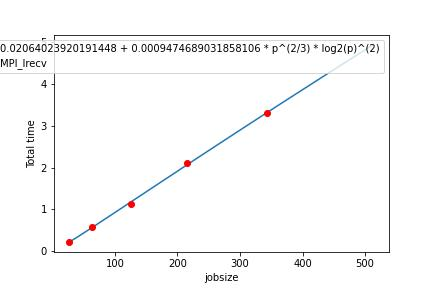
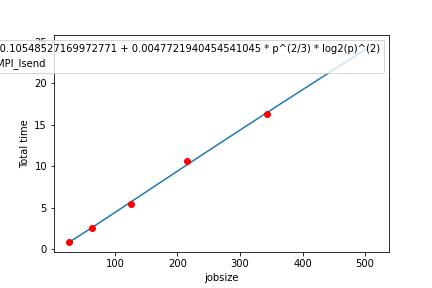
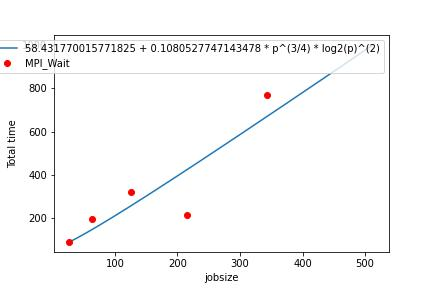
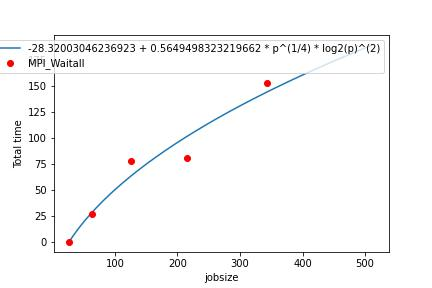
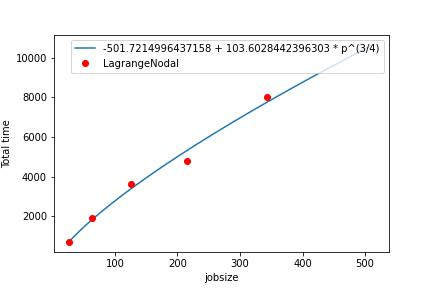
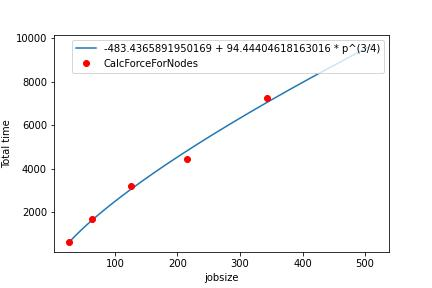
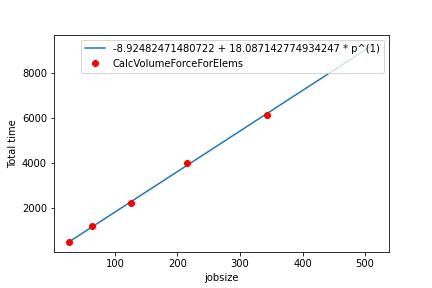
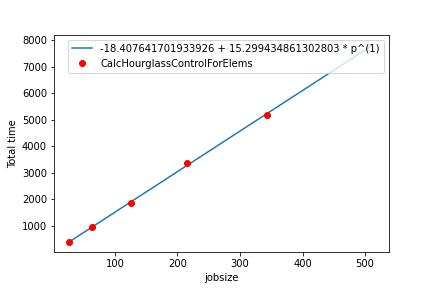
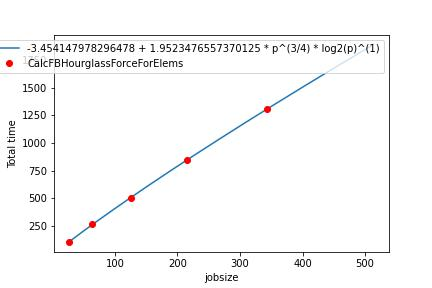
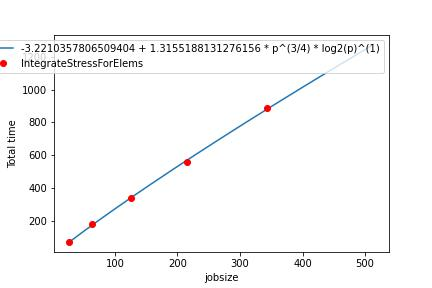
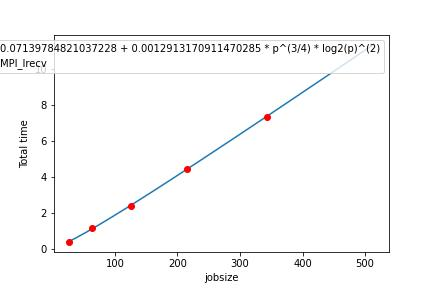
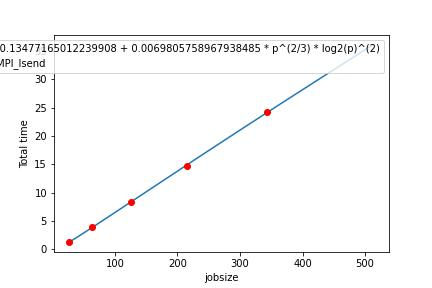
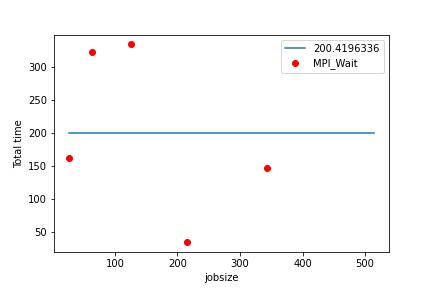
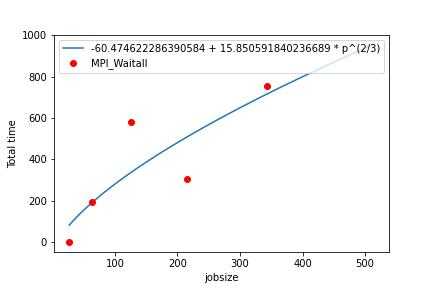
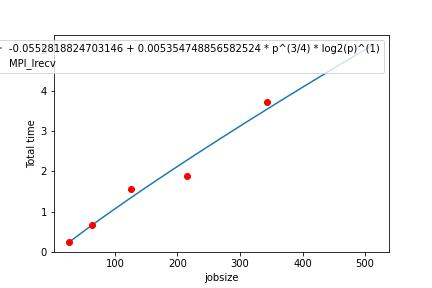
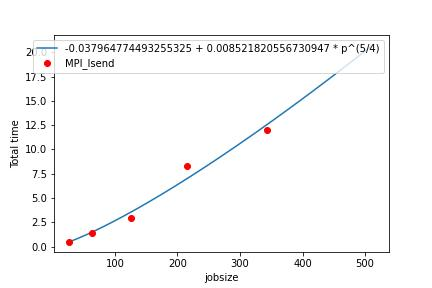
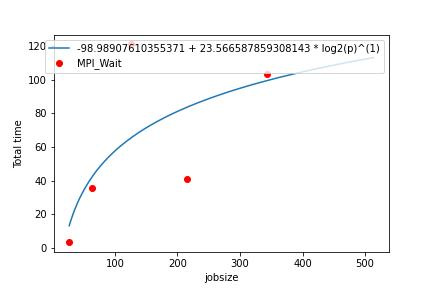
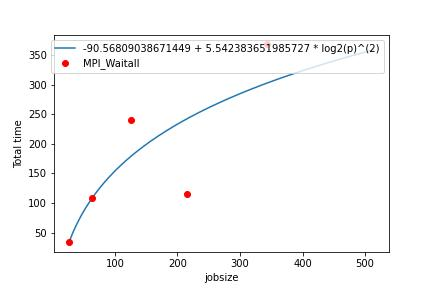
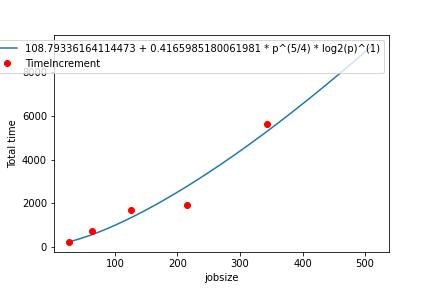
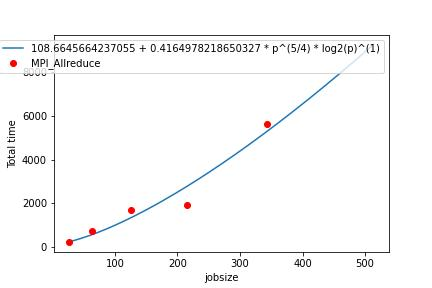

In [7]:
with pd.option_context("display.max_colwidth", 1):
    display(HTML(mdl.to_html()))

## 6. Query Specific Model

The 1st node `{"name": "MPI_Allreduce", "type": "function"}`, has an interesting graph so we want to retrieve its model. This can be achieved by indexing into the aggregated statistics table for our chosen node for the metric `Total time_extrap-model`.

In [8]:
model_obj = t_ens.statsframe.dataframe.at[t_ens.statsframe.dataframe.index[0], "Total time_extrap-model"]

## 7. Operations on a model

We can evaluate the model at a value like a function.

In [9]:
model_obj.eval(600)

9.311422624087944

### Displaying the model:

It returns a _figure_ and an _axis_ objects. The axis object can be used to adjust the plot, i.e., change labels. The `display()` function requires an input for `RSS` (bool), that determines whether to display Extra-P RSS on the plot.

<Figure size 432x288 with 0 Axes>

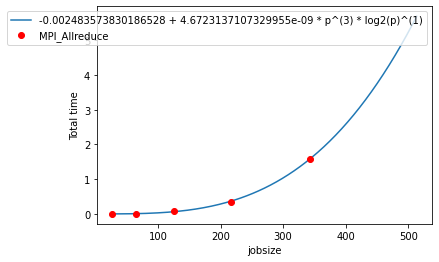

In [10]:
plt.clf()
fig, ax = model_obj.display(RSS=False)
plt.show()